In [1]:
!pip install langchain

In [2]:
!pip install openai
!pip install python-dotenv

In [2]:
import os
from openai import OpenAI
from google.colab import userdata

# Access the API key from Google Colab secrets
openai_api_key = userdata.get("OPENAI_API_KEY")

# Initialize the OpenAI client
client = OpenAI(api_key=openai_api_key)

In [1]:
!pip install -U langchain-community
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 6.6 MB/s eta 0:00:00


In [2]:
! pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 11.3 MB/s eta

# First Lets Learn about Document Loading, documents comes in different shapes and Formats, we have pDF, CSV, Website, Markdown and So other Formats and may be we want to make a Comprehenisve Chatbot that takes all forms of data
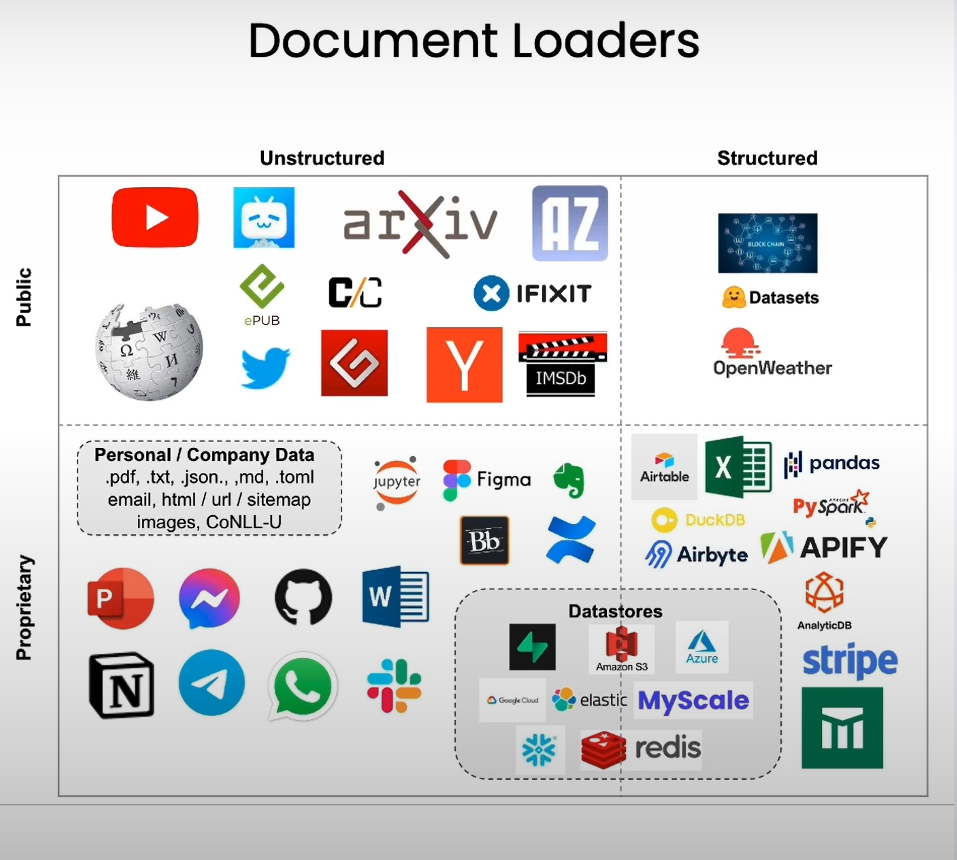

In [6]:
from langchain_community.document_loaders import PyPDFLoader

loader_pdf = PyPDFLoader("/content/MachineLearning-Lecture01.pdf")
pages = loader_pdf.load()
print(pages)
print(type(pages))
print(len(pages))
#print(pages[0])
page = pages[0]
print(page.metadata)

[Document(metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2008-07-11T11:25:23-07:00', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'source': '/content/MachineLearning-Lecture01.pdf', 'total_pages': 22, 'page': 0, 'page_label': '1'}, page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we\'ll start to talk a bit about machine learning.  \nBy way of introduction, my name\'s Andrew Ng and I\'ll be instructor for this class. And so \nI personally work in machine learning, and I\'ve worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I\'m actually always excited about teaching this class. Sometimes I actually \nthink that machine

#pypdf is a simple way to extract text data from PDFs. It does not perform OCR, nor does it capture non-textual elements like images, graphs, visualizations, or tables. If a PDF page is image-based (scanned) or contains complex layouts, pypdf will either return empty text or a jumbled output.

# # pip install langchain langchain-community pypdf pymupdf pdfplumber unstructured[all-docs] camelot-py ghostscript
from langchain_community.document_loaders import (
    PyPDFLoader, PyMuPDFLoader, PDFPlumberLoader, UnstructuredPDFLoader
)
from langchain.text_splitter import RecursiveCharacterTextSplitter

def load_pdf_robust(path: str):
    # 1) try fast/simple
    try:
        docs = PyPDFLoader(path).load()
        if any(d.page_content.strip() for d in docs):
            return docs
    except Exception:
        pass

    # 2) better layout engines
    for Loader in (PyMuPDFLoader, PDFPlumberLoader):
        try:
            docs = Loader(path).load()
            if any(d.page_content.strip() for d in docs):
                return docs
        except Exception:
            continue

    # 3) OCR / mixed content (slowest, but reliable on scans)
    #    strategy="hi_res" uses layout detection + OCR
    try:
        docs = UnstructuredPDFLoader(path, strategy="hi_res").load()
        return docs
    except Exception:
        raise RuntimeError("Failed to extract text from PDF with all strategies.")

# Example: load, then split
docs = load_pdf_robust("/content/versatile.pdf")

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=150,
    separators=["\n\n", "\n", " ", ""]
)
chunks = splitter.split_documents(docs)


In [7]:
%pip install -qU langchain-community beautifulsoup4  # For scraping data we will use beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 3.5 MB/s eta 0:00:00


In [8]:
from langchain_community.document_loaders import WebBaseLoader

loader_web = WebBaseLoader("https://ai-learnx.com/")
pages_web = loader_web.load()
print(len(pages_web))
#print(pages_web[0])
#print(pages_web)
print(pages_web[0].page_content[0:200])

1






Generative AI Training | ChatGPT Training | Corporate Training















ai-learnX















Courses 

Generative AI
Artificial Intelligence
Digital Marketing




Services 

Ripple - D


In [9]:
loader_maersk = WebBaseLoader("https://www.maersk.com/") # Add multiple URL if we have to extract multiple data
pages_maersk = loader_maersk.load()
print(len(pages_maersk))
#print(pages_john_deere[0])

1


# Now Lets Learn about Chunking
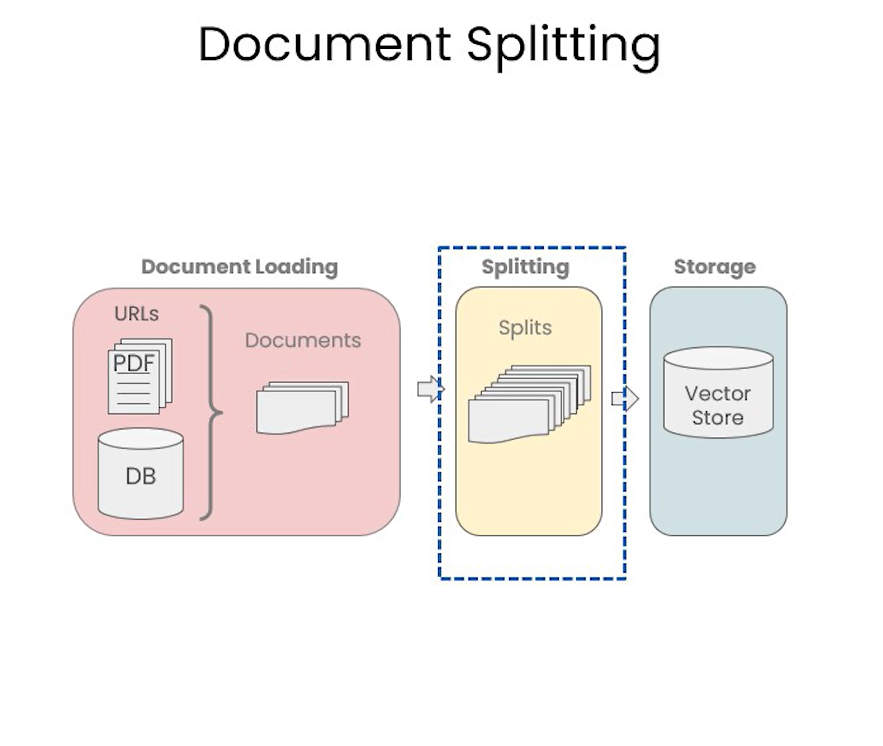

In [10]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [11]:
chunk_size =26
chunk_overlap = 4

# Lets Instantiate the Splitter Class of langchain RecursiveCharacterTextSpplitter, CharacterTextSplitter

In [12]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [13]:
print(type(r_splitter))

<class 'langchain_text_splitters.character.RecursiveCharacterTextSplitter'>


# Lets Understand by splitting aplphabets, the concepts of chunk and Overlap

In [14]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [15]:
r_splitter.split_text(text1)  # Here Langchain has defined classes under the hood and is instatiating class with r_splitter and .split_text is the attribute

['abcdefghijklmnopqrstuvwxyz']

In [16]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [17]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [18]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

# Now Lets Split Documents, in langchain we will use the concept of text_splitter and also we can chunk on document pages and we will reload the pdf loader for convenienwe

In [19]:
from langchain_community.document_loaders import PyPDFLoader

loader_pdf = PyPDFLoader("/content/MachineLearning-Lecture01.pdf")
pages = loader_pdf.load()
print(pages)
print(type(pages))
print(len(pages))
print(pages[0])
page = pages[0]
print(page.metadata)

[Document(metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2008-07-11T11:25:23-07:00', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'source': '/content/MachineLearning-Lecture01.pdf', 'total_pages': 22, 'page': 0, 'page_label': '1'}, page_content='MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we\'ll start to talk a bit about machine learning.  \nBy way of introduction, my name\'s Andrew Ng and I\'ll be instructor for this class. And so \nI personally work in machine learning, and I\'ve worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I\'m actually always excited about teaching this class. Sometimes I actually \nthink that machine

In [20]:
text_splitter = CharacterTextSplitter(
    separator="\n",   # First splitting on Line break and then addition
    chunk_size = 1000,
    chunk_overlap = 150
)

In [21]:
print(type(pages))

<class 'list'>


In [22]:
print(pages[1])

page_content='many biologers are there here? Wow, just a few, not many. I'm surprised. Anyone from 
statistics? Okay, a few. So where are the rest of you from?  
Student : iCME.  
Instructor (Andrew Ng) : Say again?  
Student : iCME.  
Instructor (Andrew Ng) : iCME. Cool.  
Student : [Inaudible].  
Instructor (Andrew Ng) : Civi and what else?  
Student : [Inaudible]  
Instructor (Andrew Ng) : Synthesis, [inaudible] systems. Yeah, cool.  
Student : Chemi.  
Instructor (Andrew Ng) : Chemi. Cool.  
Student : [Inaudible].  
Instructor (Andrew Ng) : Aero/astro. Yes, right. Yeah, okay, cool. Anyone else?  
Student : [Inaudible].  
Instructor (Andrew Ng) : Pardon? MSNE. All right. Cool. Yeah.  
Student : [Inaudible].  
Instructor (Andrew Ng) : Pardon?  
Student : [Inaudible].  
Instructor (Andrew Ng) : Endo —  
Student : [Inaudible].  
Instructor (Andrew Ng) : Oh, I see, industry. Okay. Cool. Great, great. So as you can 
tell from a cross-section of this class, I think we're a very diverse au

In [23]:
docs_string = text_splitter.split_text(pages[0].page_content) # To split string we use split_text but to split documents (which happens to be
# list of page_content, we use .split_documents)
print(type(pages[0].page_content))
print(docs_string)

<class 'str'>
["MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we'll start to talk a bit about machine learning.  \nBy way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so \nI personally work in machine learning, and I've worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I'm actually always excited about teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thing in computer science, but \nthe most exciting thing in all of human endeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learning and all aspects of machine learning. Paul Baumstarck

In [24]:
# Lets split the documents
docs = text_splitter.split_documents(pages)
print(len(pages))
print(len(docs))
print(type(docs))
print(docs)



22
78
<class 'list'>
[Document(metadata={'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'creationdate': '2008-07-11T11:25:23-07:00', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'source': '/content/MachineLearning-Lecture01.pdf', 'total_pages': 22, 'page': 0, 'page_label': '1'}, page_content="MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we'll start to talk a bit about machine learning.  \nBy way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so \nI personally work in machine learning, and I've worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I'm actually always excited about teaching this class. Sometimes I actually \nth

Character Splitting — Cheat Sheet
Core concepts

CharacterTextSplitter

Splits text by a single separator, then rebuilds chunks up to chunk_size with chunk_overlap.

split_text(text: str) → List[str]

Use when you have raw strings and don’t need metadata.

split_documents(docs: List[Document]) → List[Document]

Use when you have LangChain Documents (text + metadata) and want metadata preserved in the chunks.

How splitting really works (2 steps)

Initial split on separator → produces “pieces”

Recombine pieces into chunks of length ≤ chunk_size with chunk_overlap characters carried over to the next chunk

If the separator doesn’t appear often (or at all), step 1 yields very few pieces → sometimes no splitting.

Parameters that matter

separator: boundary to split on first (e.g., "\n", "\n\n", " ", or "")

chunk_size: max characters per chunk (common: 800–1500 for classic embedding use; can go larger for modern models)

chunk_overlap: characters duplicated from the end of one chunk to the start of the next (common: 100–200)

Recommended separators (by content type)

Use these with CharacterTextSplitter(..., separator=...) or let RecursiveCharacterTextSplitter try several for you.

PDFs / OCR’d docs / lecture notes

✅ "\n" (most PDFs preserve single line breaks, not blank lines)

If chunks look too small/fragmented, consider RecursiveCharacterTextSplitter with fallback separators.

Markdown / well-formed prose

✅ "\n\n" (paragraphs)

If your file lacks blank lines, drop to "\n".

Plain text articles / emails

✅ "\n\n", fallback "\n".

Code

✅ "\n" (line-wise), possibly use a code-aware splitter (e.g., Language splitters) if available.

CSV / logs (line-based)

✅ "\n".

HTML / web pages

Prefer a DOM-aware loader then split on paragraphs/blocks. If you must, use "\n\n" after cleaning tags, or use specialized splitters (e.g., HTMLHeaderTextSplitter).

Best practice: prefer Recursive splitting

If you want it to “just work” across mixed formatting:

from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=150,
    # Custom order if you want:
    # separators=["\n\n", "\n", " ", ""]
)
split_docs = splitter.split_documents(pages)  # works with List[Document]


In [25]:
# Lets Split on Tokens, LLMs often comes with token context Limitation
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)
text_1 =" abr ka dab ra"   # Cross verify tiketoken method employed by openai, run the text in https://tiktokenizer.vercel.app/?model=cl100k_base

In [26]:
text_splitter.split_text(text_1)

[' ab', 'r', ' ka', ' dab', ' ra']

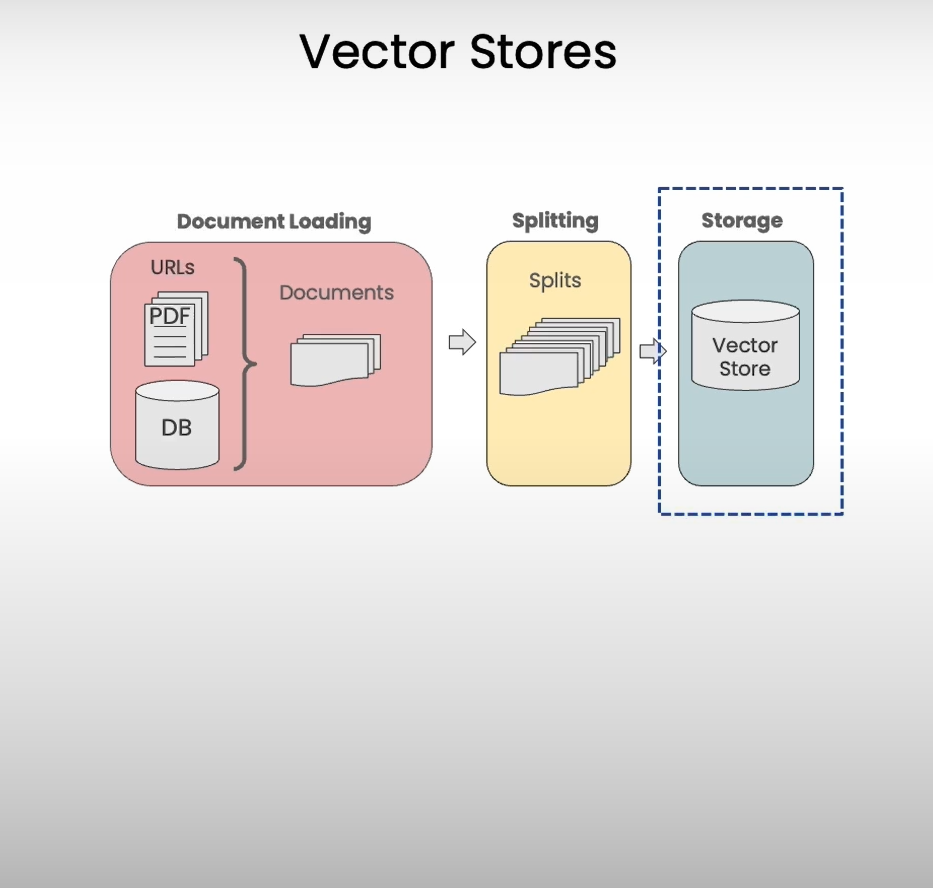

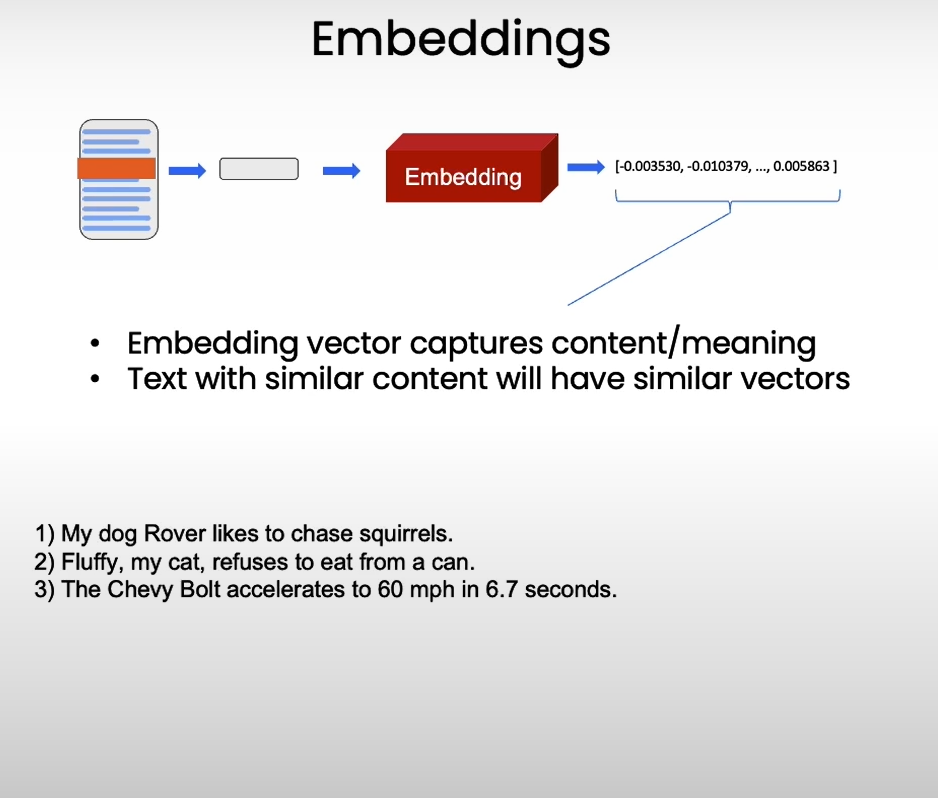

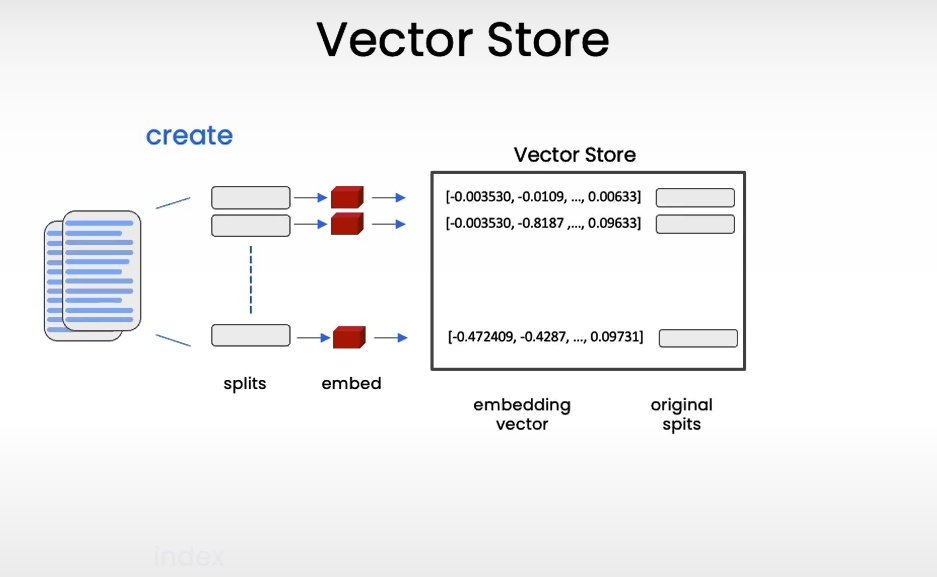

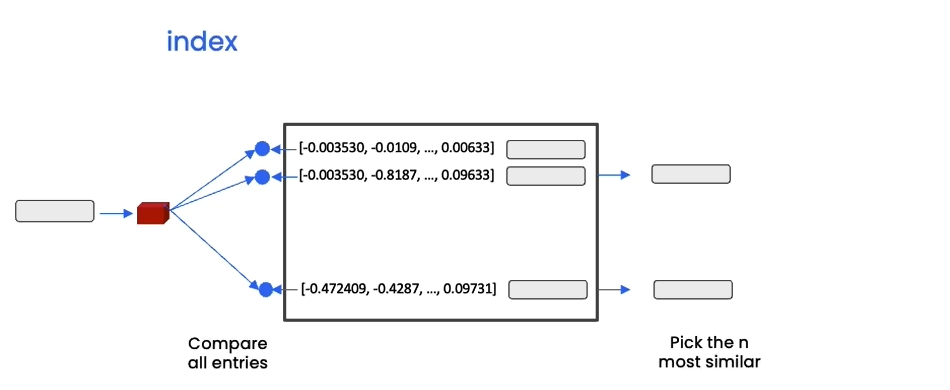

In [27]:
import os
import openai
from langchain_openai import OpenAIEmbeddings
from google.colab import userdata

embedding = OpenAIEmbeddings(
    model="text-embedding-3-small",
    api_key=userdata.get("OPENAI_API_KEY")",  # pass explicitly
)
vec = embedding.embed_query("Hello embeddings 👋")

print(len(vec))

/tmp/ipython-input-64449504.py:5: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding = OpenAIEmbeddings(


1536


In [28]:
import numpy as np
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [30]:
embedding1 = embedding.embed_query(sentence1) # This is applicable for string embedding, our chunk is a list
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [31]:
np.dot(embedding1, embedding2)

np.float64(0.8338437825231421)

In [32]:
np.dot(embedding1, embedding3)

np.float64(0.21898136361418555)

In [33]:
np.dot(embedding2, embedding3)

np.float64(0.18506880099586348)

In [34]:
# Food for thought, need to dig deeper, even semantically closer but still far away in vector space

sentence1 = "Apple performance last year was terrific"
sentence2 = "Apple harvest last year was terrific"
sentence3 = "Apple is so Sweet"

In [35]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [36]:
import numpy as np
np.dot(embedding1, embedding2)



np.float64(0.7038627926965553)

In [37]:
np.dot(embedding2, embedding3)

np.float64(0.47497214633073015)

In [38]:
np.dot(embedding1,embedding3)

np.float64(0.6017785529077975)

Vector Stores

In [39]:

from langchain_chroma import Chroma


In [40]:
persist_directory = 'docs/chroma/'

In [41]:
!rm -rf ./docs/chroma  # remove old database files if any

In [43]:
vectordb = Chroma.from_documents(
    documents=docs,
    embedding=embedding,
    persist_directory=persist_directory
)

In [44]:
print(vectordb._collection.count())

78


In [46]:
question = "is there an email i can ask for help"

In [47]:
new_doc=vectordb.similarity_search(question,k=3)

In [50]:
print(new_doc)

[Document(metadata={'page_label': '6', 'total_pages': 22, 'creationdate': '2008-07-11T11:25:23-07:00', 'title': '', 'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'creator': 'PScript5.dll Version 5.2.2', 'page': 5, 'source': '/content/MachineLearning-Lecture01.pdf', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00'}, page_content="newsgroup that's sort of a forum for people in the class to get to know each other and \nhave whatever discussions you want to have amongst yourselves. So the class newsgroup \nwill not be monitored by the TAs and me. But this is a place for you to form study groups \nor find project partners or discuss homework problems and so on, and it's not monitored \nby the TAs and me. So feel free to talk trash about this class there.  \nIf you want to contact the teaching staff, please use the email address written down here, \ncs229-qa@cs.stanford.edu. This goes to an account that's read by all the TAs and me. So \nrather than sending us email individually, if y

In [49]:
question = "what did they say about regression in the third lecture?"

In [51]:
new_doc_question=vectordb.similarity_search(question,k=3)

In [52]:
print(new_doc_question)

[Document(metadata={'creator': 'PScript5.dll Version 5.2.2', 'author': '', 'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'source': '/content/MachineLearning-Lecture01.pdf', 'title': '', 'total_pages': 22, 'page_label': '9', 'creationdate': '2008-07-11T11:25:23-07:00', 'page': 8, 'moddate': '2008-07-11T11:25:23-07:00'}, page_content='logistic regression? Was it the PCA? Was it the data networks? What was it that you \nlearned that was so helpful?" And the student said, "Oh, it was the MATLAB."  \nSo for those of you that don\'t know MATLAB yet, I hope you do learn it. It\'s not hard, \nand we\'ll actually have a short MATLAB tutorial in one of the discussion sections for \nthose of you that don\'t know it.  \nOkay. The very last piece of logistical thing is the discussion sections. So discussion \nsections will be taught by the TAs, and attendance at discussion sections is optional, \nalthough they\'ll also be recorded and televised. And we\'ll use the discussion sections \nmainly fo

In [53]:
for doc in new_doc_question:
    print(doc.metadata)

{'creator': 'PScript5.dll Version 5.2.2', 'author': '', 'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'source': '/content/MachineLearning-Lecture01.pdf', 'title': '', 'total_pages': 22, 'page_label': '9', 'creationdate': '2008-07-11T11:25:23-07:00', 'page': 8, 'moddate': '2008-07-11T11:25:23-07:00'}
{'creator': 'PScript5.dll Version 5.2.2', 'author': '', 'total_pages': 22, 'page_label': '13', 'source': '/content/MachineLearning-Lecture01.pdf', 'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'page': 12, 'moddate': '2008-07-11T11:25:23-07:00', 'title': '', 'creationdate': '2008-07-11T11:25:23-07:00'}
{'creator': 'PScript5.dll Version 5.2.2', 'producer': 'Acrobat Distiller 8.1.0 (Windows)', 'total_pages': 22, 'creationdate': '2008-07-11T11:25:23-07:00', 'page_label': '10', 'author': '', 'moddate': '2008-07-11T11:25:23-07:00', 'source': '/content/MachineLearning-Lecture01.pdf', 'title': '', 'page': 9}


Addressing Specificity: working with metadata using self-query retriever
But we have an interesting challenge: we often want to infer the metadata from the query itself.

To address this, we can use SelfQueryRetriever, which uses an LLM to extract:

The query string to use for vector search
A metadata filter to pass in as well
Most vector databases support metadata filters, so this doesn't require any new databases or indexes.

In [54]:
from langchain_openai import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo

In [55]:
metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The lecture the chunk is from, should be one of `docs/cs229_lectures/MachineLearning-Lecture01.pdf`, `docs/cs229_lectures/MachineLearning-Lecture02.pdf`, or `docs/cs229_lectures/MachineLearning-Lecture03.pdf`",
        type="string",
    ),
    AttributeInfo(
        name="page",
        description="The page from the lecture",
        type="integer",
    ),
]

In [58]:
from langchain_openai import OpenAI
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo
from google.colab import userdata

document_content_description = "Lecture notes"
llm = OpenAI(model='gpt-4o-mini', temperature=0, openai_api_key=userdata.get("OPENAI_API_KEY"))
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectordb,
    document_content_description,
    metadata_field_info,
    verbose=True
)

You may rerun the code AND EVERY TIME SAME DOCUMENTS vectordata is created and we keep on adding, which is unnecssary and reduntant, in order to control that, we will create unique ids at the time of chunking and when we pass on the data to the chroma gain it can c the ids and accept and reject basis presence in vector db, code for that is

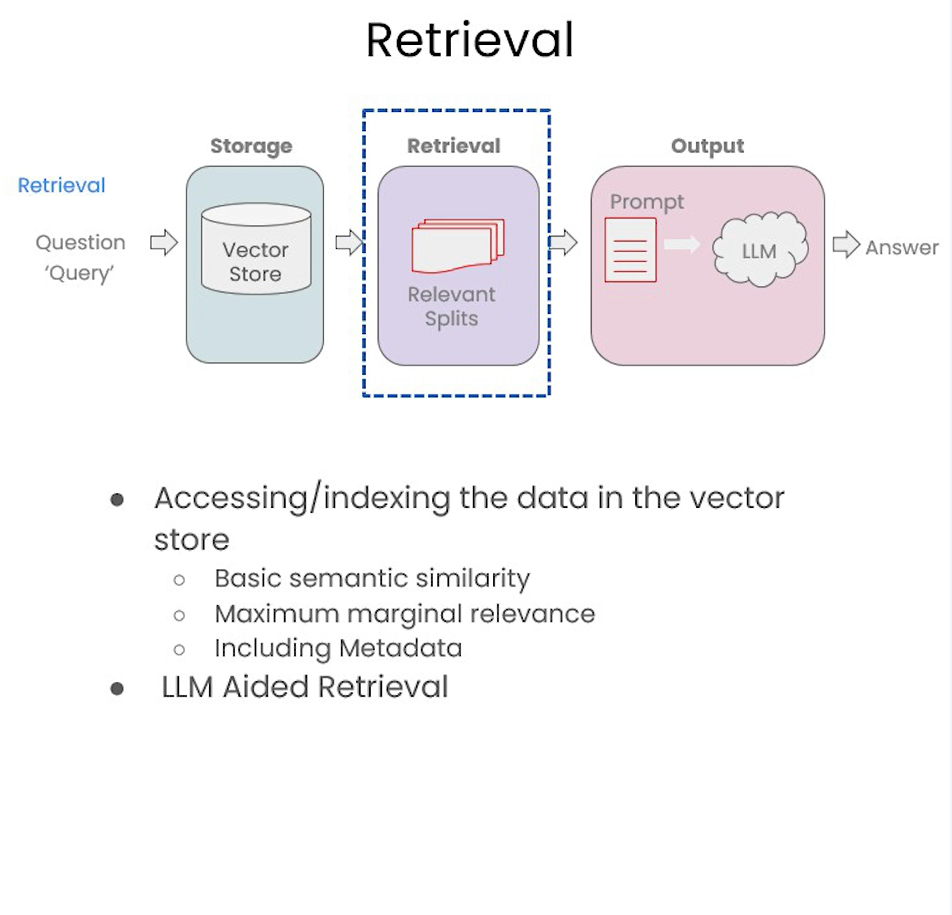

In [61]:
from langchain_openai import ChatOpenAI


In [78]:
from langchain_openai import ChatOpenAI
from google.colab import userdata

lm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, openai_api_key=userdata.get("OPENAI_API_KEY"))

RetrievalQA chain

In [79]:
from langchain.chains import RetrievalQA

In [80]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [86]:
from langchain.chains import RetrievalQA
from google.colab import userdata
from langchain_openai import OpenAI

# Use environment variable for API key (secure approach)
llm = OpenAI(model='gpt-4o-mini', temperature=0, openai_api_key=userdata.get("OPENAI_API_KEY"))

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [ ]:
question = "What are major topics for this class?"
# Use the qa_chain with the question
result = qa_chain({"query": question})
print(result) # Print the result to see the answer

In case u need to provide sepecific prompt, can use langchain prompt template

In [88]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [90]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
question = "Is probability a class topic?"

In [ ]:
# Install required packages for conversation memory
!pip install -qU langchain-openai langchain-chroma langchain-community


## Conversation Memory for Continuous Discussion

Now let's add conversation memory so the RAG system can maintain context across multiple questions.


In [ ]:
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain_openai import ChatOpenAI
from google.colab import userdata

# Initialize ChatOpenAI for conversational use
llm_chat = ChatOpenAI(
    model_name="gpt-4o-mini",
    temperature=0,
    openai_api_key=userdata.get("OPENAI_API_KEY")
)

# Create conversation memory
memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True,
    output_key="answer"
)

# Create conversational retrieval chain
qa_conversational = ConversationalRetrievalChain.from_llm(
    llm=llm_chat,
    retriever=vectordb.as_retriever(),
    memory=memory,
    return_source_documents=True,
    verbose=False
)

print("Conversational RAG system initialized!")


In [ ]:
# Test 1: Ask first question
question1 = "What are the major topics covered in this class?"
result1 = qa_conversational({"question": question1})

print("Question 1:", question1)
print("\nAnswer 1:", result1['answer'])
print("\n" + "="*80 + "\n")


In [ ]:
# Test 2: Ask follow-up question (uses memory from previous conversation)
question2 = "Can you elaborate more on the first topic you mentioned?"
result2 = qa_conversational({"question": question2})

print("Question 2:", question2)
print("\nAnswer 2:", result2['answer'])
print("\n" + "="*80 + "\n")


In [ ]:
# Test 3: Ask another follow-up that references previous conversation
question3 = "How does that relate to what we discussed earlier?"
result3 = qa_conversational({"question": question3})

print("Question 3:", question3)
print("\nAnswer 3:", result3['answer'])
print("\n" + "="*80 + "\n")


In [ ]:
# View conversation history
print("=== Conversation History ===")
print(memory.load_memory_variables({}))


In [ ]:
# Clear memory if needed (optional)
memory.clear()
print("Memory cleared!")


## Advanced: Custom Prompt with Memory

You can also customize the prompts used with conversational memory.


In [ ]:
from langchain.prompts import PromptTemplate

# Custom prompt template for conversational RAG
custom_template = """You are a helpful teaching assistant. Use the following context and chat history to answer the question.
If you don't know the answer, say you don't know. Keep answers concise but informative.

Context: {context}

Chat History: {chat_history}

Question: {question}

Helpful Answer:"""

# Create new conversational chain with custom prompt
qa_custom = ConversationalRetrievalChain.from_llm(
    llm=llm_chat,
    retriever=vectordb.as_retriever(),
    memory=ConversationBufferMemory(
        memory_key="chat_history",
        return_messages=True,
        output_key="answer"
    ),
    return_source_documents=True,
    combine_docs_chain_kwargs={"prompt": PromptTemplate(
        template=custom_template,
        input_variables=["context", "chat_history", "question"]
    )}
)

print("Custom conversational RAG system initialized!")
